## Data Generation for SageMaker Games Workshop

First we will import all necessary libraries.

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Set some parameters for the dataset.

In [155]:
difficultySize = 10000
featureList = ["difficulty", "wins", "losses", "timeplayed"]
difficultyLabel = [0, 1, 2]

Then we create dataframes for each difficulty level.

In [156]:
zeros = np.zeros(shape=(difficultySize, len(featureList)))

easy = pd.DataFrame(zeros, columns=featureList)
medium = pd.DataFrame(zeros, columns=featureList)
hard = pd.DataFrame(zeros, columns=featureList)

Let's check out what we have just created to make sure it looks ok.

In [157]:
easy.shape

(10000, 4)

In [158]:
medium.head(10)

,difficulty,wins,losses,timeplayed
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0


Now we can create a Gaussian distribution of values for each column for the "easy" difficulty. We are also taking the square of the distribution so we have no negative win or loss values as this should not exist. This also increases the number of "0 wins" cases, which will presumably be a large portion of real life data.

In [159]:
easy["wins"] = np.floor(np.square(np.random.normal(scale=2, size=difficultySize)))

(array([3805., 1368.,  933.,  702.,  508.,  428.,  351.,  293.,  271.,
         206.,  154.,  143.,  113.,   93.,   89.,   90.,   61.,   54.,
          44.,   27.,   32.,   34.,   22.,   27.,   24.,   21.,   15.,
          13.,   12.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 29 Patch objects>)

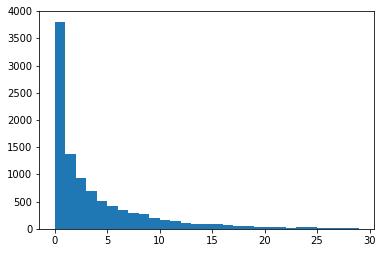

In [160]:
plt.hist(easy["wins"], bins=np.arange(0,30))

Now we will create a losses value according to the corresponding wins column to create a win percentage less than 25%. We will also not include 0 losses as 0-0 has a default value.

In [161]:
easy["losses"] = 3 * easy["wins"] + np.floor(np.square(np.random.normal(scale=2, size=difficultySize))+1)

Now a distribution for the time value of the length of a single play session, for beginners we are assuming that they will get caught relatively quickly.

In [162]:
easy["timeplayed"] = abs(np.random.normal(loc=20, scale=20, size=difficultySize))

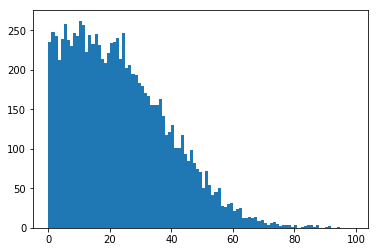

In [163]:
plt.hist(easy["timeplayed"], bins=np.arange(0,100))
plt.show()

Let's make sure that this is producing valid data points! Note that the label for difficulty of easy is 0 so this is already good.

In [164]:
easy.head(20)

,difficulty,wins,losses,timeplayed
0,0.0,2.0,7.0,10.968985
1,0.0,12.0,42.0,41.910744
2,0.0,0.0,1.0,12.860340
3,0.0,0.0,2.0,20.723078
4,0.0,15.0,46.0,1.274916
5,0.0,7.0,22.0,3.585336
6,0.0,1.0,4.0,2.377362
7,0.0,6.0,35.0,13.189718
8,0.0,3.0,16.0,29.724580
9,0.0,0.0,2.0,4.081368


Now we can do a similar process to create the medium and hard difficulties.

In [165]:
medium["difficulty"] = 1
medium["wins"] = np.floor(abs(np.random.normal(loc=1, scale=5, size=difficultySize))+1)
medium["losses"] = medium["wins"] + np.floor(np.square(np.random.normal(scale=1, size=difficultySize)))
medium["timeplayed"] = abs(np.random.normal(loc=60, scale=15, size=difficultySize))

hard["difficulty"] = 2
hard["losses"] = np.floor(abs(np.random.normal(loc=0, scale=5, size=difficultySize)))
hard["wins"] = hard["losses"] + np.floor(abs(np.random.normal(loc=0, scale=3, size=difficultySize))+2) 
hard["timeplayed"] = abs(np.random.normal(loc=60, scale=15, size=difficultySize))

In [166]:
medium.head()

,difficulty,wins,losses,timeplayed
0,1,5.0,5.0,43.176932
1,1,5.0,7.0,68.078410
2,1,2.0,2.0,83.075228
3,1,4.0,4.0,91.400646
4,1,3.0,3.0,62.752088


In [167]:
hard.head()

,difficulty,wins,losses,timeplayed
0,2,11.0,4.0,75.242382
1,2,7.0,1.0,58.131055
2,2,4.0,2.0,48.809695
3,2,11.0,7.0,75.844539
4,2,6.0,0.0,36.919860


Now that we have our 3 difficulty data frames, we need to combine them together, shuffle the rows, and write them to a CSV file.

In [168]:
data = pd.concat([easy, medium, hard], axis=0)
data.shape

(30000, 4)

In [169]:
data = data.sample(frac=1).reset_index(drop=True)
data.head(20)

,difficulty,wins,losses,timeplayed
0,2.0,2.0,0.0,64.838483
1,0.0,7.0,25.0,19.880880
2,1.0,4.0,4.0,71.784861
3,1.0,5.0,5.0,52.622701
4,2.0,6.0,3.0,43.388025
5,2.0,7.0,5.0,66.518859
6,2.0,11.0,3.0,43.871268
7,2.0,5.0,2.0,56.965001
8,2.0,2.0,0.0,48.970201
9,1.0,3.0,4.0,38.018971


In [170]:
#TODO write to CSV, find out if you should compress the file (Check XGBoost) and see if there is an S3 bucket that already exists that this notebook instance has permissions to write to.